CANIS Hackathon 2023  
Submission by:  
Jericho Pantony  
Rhea Zambra  

# Overview

The objective of this text analysis is to do two different analyses:  
1. To identify clusters of words that tend to appear in fake news articles and understand why, and  
2. To perform a sentiment analysis to understand the tonality tendencies of fake vs. true articles.
  
The analysis will first perform a sentiment analysis to analyze the differences in tone between fake and real articles, then to expand further, clustering and analysis of the most frequent words will be performed. The analysis will involve clustering the text data using a dendrogram, which is a hierarchical representation of the clusters, and creating a word cloud to visually represent the most frequent words in each cluster. By identifying the clusters of words that are commonly used in fake news articles, we hope to gain insight into the patterns and characteristics of fake news and the motivations behind their creation. The steps we took to do so are as follows:
###### 1. Pre-process the Data (Data Cleaning)
###### 2. Sentiment Analysis
###### 3. Dendrogram
###### 4. Network Graph
###### 5. Wordcloud

<span style="color:red"> *Note: There will be sections of code that are currently commented out, but have been ran before and outputted to a text or .csv file. To save time, those output files are used in downstream runs, but the original data cleanup steps are still included in this report.* </span>

## 1. Pre-processing Data
We begin by importing and installing the packages required to analyze the dataset:

In [61]:
#Importing all needed libraries
import re
import numpy as np
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns
import string
from collections import Counter
import matplotlib
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import scipy.cluster.hierarchy as sch
import multiprocessing
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram, linkage
import networkx as nx
import collections

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zambr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zambr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zambr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Data Cleaning**  
This data cleaning stage is specifically for the sentiment analysis. Further data cleaning steps will be taken later for the clustering and word analysis.

In [42]:
#Creating a dictionary to correct for improper contractions
contractions_dict = {
    "ain t": "ain`t",
    "can t": "can`t",
    "couldn t": "couldn`t",
    "didn t": "didn`t",
    "doesn t": "doesn`t",
    "don t": "don`t",
    "hadn t": "hadn`t",
    "hasn t": "hasn`t",
    "haven t": "haven`t",
    "he d": "he`d",
    "he ll": "he`ll",
    "he s": "he`s",
    "i d": "i`d",
    "i ll": "i`ll",
    "i m": "i`m",
    "i ve": "i`ve",
    "isn t": "isn`t",
    "it s": "it`s",
    "let s": "let`s",
    "mustn t": "mustn`t",
    "shan t": "shan`t",
    "she d": "she`d",
    "she ll": "she`ll",
    "she s": "she`s",
    "shouldn t": "shouldn`t",
    "that s": "that`s",
    "there s": "there`s",
    "they d": "they`d",
    "they ll": "they`ll",
    "they re": "they`re",
    "they ve": "they`ve",
    "wasn t": "wasn`t",
    "we d": "we`d",
    "we ll": "we`ll",
    "we re": "we`re",
    "we ve": "we`ve",
    "weren t": "weren`t",
    "what ll": "what`ll",
    "what re": "what`re",
    "what s": "what`s",
    "what ve": "what`ve",
    "where s": "where`s",
    "who d": "who`d",
    "who ll": "who`ll",
    "who re": "who`re",
    "who s": "who`s",
    "who ve": "who`ve",
    "won t": "won`t",
    "wouldn t": "wouldn`t",
    "you d": "you`d",
    "you ll": "you`ll",
    "you re": "you`re",
    "you ve": "you`ve"
}

The code below loading the text data and:  
****a) correcting for improper contractions, and  
b) detecting the language.****

Correcting for improper contractions is important as this will make the model in a later section (sentiment analysis) be able to detect the tone more accurately.
As for the language, only text articles that are in English will be used in this report, as the model only works in that language.

The code block is commented out to save time, as it was already ran once. In downstream models, the output file is used to create the dataframes.

In [3]:
# # Loading the text file using encoding utf-8 to preserve the characters
# with open('DataSet_Misinfo_TRUE_Text.txt', 'r', encoding='utf-8', errors='ignore') as f:
#    fake_text = f.read()

# # Replace incomplete contractions with complete ones
# pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b')
# fake_text = pattern.sub(lambda x: contractions_dict[x.group()], fake_text)

# # Split text into rows
# rows = fake_text.splitlines()

# # Split rows into columns: index, text
# data = []
# for row in rows:
#    try:
#        lang = detect(row)
#    except LangDetectException as e:
#        lang = 'unknown'
#    columns = row.split(',"')
#    columns.append(lang)
#    data.append(columns)

    
# # Open a file for writing and storing the cleaned dataset with language
# with open('DataSet_Misinfo_TRUE__cleaned.txt', 'w', encoding='utf-8') as f:
    
#    # Loop through the list and write each element to a new line in the file
#    for row in data:
#        f.write(str(row) + '\n')

In [4]:
# Loading the cleaned text files (True and Fake) with the language detected
with open('DataSet_Misinfo_FAKE__cleaned.txt', 'r', encoding='utf-8', errors='ignore') as f:
    temp_fake_text_cleaned = f.read()
    
with open('DataSet_Misinfo_TRUE__cleaned.txt', 'r', encoding='utf-8', errors='ignore') as f:
    temp_true_text_cleaned = f.read()

    
# Split text into rows
temp_fake_text_cleaned = temp_fake_text_cleaned.splitlines()
temp_true_text_cleaned = temp_true_text_cleaned.splitlines()


# Split rows into columns: index, text
# Replacing a few characters for more data cleanup
fake_text_cleaned = []
for temp_fake_text in temp_fake_text_cleaned:
    temp_fake_text = temp_fake_text.replace("[", "")
    temp_fake_text = temp_fake_text.replace("]", "")
    columns = temp_fake_text.split(", '")
    fake_text_cleaned.append(columns)
    
true_text_cleaned = []
for temp_true_text in temp_true_text_cleaned:
    temp_true_text = temp_true_text.replace("[", "")
    temp_true_text = temp_true_text.replace("]", "")
    columns = temp_true_text.split(", '")
    true_text_cleaned.append(columns)

    
# Display first 3 rows
print("Sample Fake Text: \n")
for i in range(3):
    print(str(fake_text_cleaned[i]) + '\n')
    
print("Sample True Text: \n")
for i in range(3):
    print(str(true_text_cleaned[i]) + '\n')

Sample Fake Text: 

["'0'", 'Donald Trump just couldn`t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn`t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you`d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! 

In [43]:
#Filtering for text results that are in English
filtered_list_fake = [ft for ft in fake_text_cleaned if ft[-1] == "en'"]
filtered_list_true = [tt for tt in true_text_cleaned if tt[-1] == "en'"]


#removing indices and gathering just text data
#some rows have 2 columns (text, language), others 3 columns (index, text, language)
final_en_fake_list = []
for row in filtered_list_fake:
    if row is not None and len(row) == 2:
        final_en_fake_list.append(str(row[0:1]))
    elif row is not None:
        final_en_fake_list.append(str(row[1:2]))
        
final_en_true_list = []
for row in filtered_list_true:
    if row is not None and len(row) == 2:
        final_en_true_list.append(str(row[0:1]))
    elif row is not None:
        final_en_true_list.append(str(row[1:2]))

    
print("There are originally " + str(len(fake_text_cleaned)) + " fake articles.")
print("There are " + str(len(final_en_fake_list)) + " detected fake articles in English.\n")
print("There are originally " + str(len(true_text_cleaned)) + " true articles.")
print("There are " + str(len(final_en_true_list)) + " detected true articles in English.\n")

There are originally 212487 fake articles.
There are 192748 detected fake articles in English.

There are originally 154055 true articles.
There are 93420 detected true articles in English.



As noted from above, the dataset has decreased about 10% for fake articles, and about 40% for real articles.  This disparity in the total number of datapoints used should be noted, but overall, the sample sizes for both are plentiful.

## Sentiment Analysis

In this part, a ****sentiment analysis**** is performed using the nltk library. This analysis quantifies the tone of each text block by sentence, giving it a score for four categories:  
1. Positive - How positive the tone of the text is (0 to 1).
2. Negative - How negative the tone of the text is (0 to 1).
3. Neutral - How neutral the tone of the text is (0 to 1).
4. Compound - How positive or negative the overall tone of the text is (-1 to 1).  
  
By scoring each sentence sequentially, a text block is essentially scored for its tone with time.

In [6]:
# # Initialize the sentiment analyzer
# sid = SentimentIntensityAnalyzer()

# # Create an empty matrix to store the sentiment scores for each sentence in each text block
# sentiment_scores = []

# # Loop through each text block in the final_en_fake_list
# for text_block in final_en_true_list:
#     # Tokenize the text block into sentences
#     sentences = nltk.sent_tokenize(text_block)
    
#     # Create an empty list to store the sentiment scores for each sentence in this text block
#     text_block_scores = []
    
#     # Loop through each sentence in the text block
#     for sentence in sentences:
#         # Get the sentiment score for the sentence using the sentiment analyzer
#         scores = sid.polarity_scores(sentence)
#         # Append the sentiment score to the list for this text block
#         text_block_scores.append(scores)
    
#     # Append the list of sentiment scores for this text block to the matrix
#     sentiment_scores.append(text_block_scores)

# # Write the sentiment scores matrix to a CSV file
# with open('sentiment_scores_True_Text_Clean.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['Text Block', 'Sentence', 'Positive', 'Negative', 'Neutral', 'Compound'])
#     for i, text_block_scores in enumerate(sentiment_scores):
#         for j, scores in enumerate(text_block_scores):
#             writer.writerow([i+1, j+1, scores['pos'], scores['neg'], scores['neu'], scores['compound']])

The sentiment analysis code block, which assigns the score to each sentence for all text blocks, is commented out for time. The output file from its first successful run is used in downstream models.

In [7]:
# Read the CSV file into a pandas DataFrame
df_fake = pd.read_csv('sentiment_scores_Fake_Text_Clean.csv')
df_true = pd.read_csv('sentiment_scores_True_Text_Clean.csv')


# Pivot the DataFrame to create a new DataFrame where each row is a Text Block
# and each column is a Sentence with the Compound score as values
new_df_fake_compound = pd.pivot_table(df_fake, index='Text Block', columns='Sentence', values='Compound', aggfunc='first')
new_df_fake_positive = pd.pivot_table(df_fake, index='Text Block', columns='Sentence', values='Positive', aggfunc='first')
new_df_fake_negative = pd.pivot_table(df_fake, index='Text Block', columns='Sentence', values='Negative', aggfunc='first')

new_df_true_compound = pd.pivot_table(df_true, index='Text Block', columns='Sentence', values='Compound', aggfunc='first')
new_df_true_positive = pd.pivot_table(df_true, index='Text Block', columns='Sentence', values='Positive', aggfunc='first')
new_df_true_negative = pd.pivot_table(df_true, index='Text Block', columns='Sentence', values='Negative', aggfunc='first')


# Rename the columns to have "Sentence" before the sentence number
new_df_fake_compound.columns = [f'Sentence {c}' for c in new_df_fake_compound.columns]
new_df_fake_positive.columns = [f'Sentence {c}' for c in new_df_fake_compound.columns]
new_df_fake_negative.columns = [f'Sentence {c}' for c in new_df_fake_compound.columns]

new_df_true_compound.columns = [f'Sentence {c}' for c in new_df_true_compound.columns]
new_df_true_positive.columns = [f'Sentence {c}' for c in new_df_true_compound.columns]
new_df_true_negative.columns = [f'Sentence {c}' for c in new_df_true_compound.columns]


# Reset the index so that "Text Block" is a column instead of the index
new_df_fake_compound = new_df_fake_compound.reset_index()
new_df_fake_positive = new_df_fake_positive.reset_index()
new_df_fake_negative = new_df_fake_negative.reset_index()

new_df_true_compound = new_df_true_compound.reset_index()
new_df_true_positive = new_df_true_positive.reset_index()
new_df_true_negative = new_df_true_negative.reset_index()


# Find the last non-null index to the right of each row
first_nan_index_fake_compound = np.argmax(new_df_fake_compound.isna().values, axis=1)
first_nan_index_fake_positive = np.argmax(new_df_fake_positive.isna().values, axis=1)
first_nan_index_fake_negative = np.argmax(new_df_fake_negative.isna().values, axis=1)

first_nan_index_true_compound = np.argmax(new_df_true_compound.isna().values, axis=1)
first_nan_index_true_positive = np.argmax(new_df_true_positive.isna().values, axis=1)
first_nan_index_true_negative = np.argmax(new_df_true_negative.isna().values, axis=1)


# Replace values in first_nan_index where there is no NaN to 290 (meaning all rows are populated)
first_nan_index_fake_compound = np.where(first_nan_index_fake_compound == 0, 291, first_nan_index_fake_compound)
first_nan_index_fake_compound = first_nan_index_fake_compound-2
first_nan_index_fake_compound = np.transpose(first_nan_index_fake_compound)
first_nan_index_fake_positive = np.where(first_nan_index_fake_positive == 0, 291, first_nan_index_fake_positive)
first_nan_index_fake_positive = first_nan_index_fake_positive-2
first_nan_index_fake_positive = np.transpose(first_nan_index_fake_positive)
first_nan_index_fake_negative = np.where(first_nan_index_fake_negative == 0, 291, first_nan_index_fake_negative)
first_nan_index_fake_negative = first_nan_index_fake_negative-2
first_nan_index_fake_negative = np.transpose(first_nan_index_fake_negative)

first_nan_index_true_compound = np.where(first_nan_index_true_compound == 0, 291, first_nan_index_true_compound)
first_nan_index_true_compound = first_nan_index_true_compound-2
first_nan_index_true_compound = np.transpose(first_nan_index_true_compound)
first_nan_index_true_positive = np.where(first_nan_index_true_positive == 0, 291, first_nan_index_true_positive)
first_nan_index_true_positive = first_nan_index_true_positive-2
first_nan_index_true_positive = np.transpose(first_nan_index_true_positive)
first_nan_index_true_negative = np.where(first_nan_index_true_negative == 0, 291, first_nan_index_true_negative)
first_nan_index_true_negative = first_nan_index_true_negative-2
first_nan_index_true_negative = np.transpose(first_nan_index_true_negative)

Since each text block has differing number of sentences, I normalized this parameter to standardize the "x" or "time" variable.
For example, if TextBlock1 has 3 sentences, and TextBlock2 has 4 sentences:  
- TextBlock1's sentiment scores appear at 0.33, 0.67, and 1.0.
- TextBlock2's sentiment scores appear at 0.25, 0.50, 0.75, and 1.0

C:\Users\zambr\AppData\Local\Temp\ipykernel_16600\2093614570.py:11: RuntimeWarning: divide by zero encountered in divide
  index_temp_standardized_compound_fake = (index_temp_fake.astype(float) / first_nan_index_fake_compound.astype(float))
C:\Users\zambr\AppData\Local\Temp\ipykernel_16600\2093614570.py:13: RuntimeWarning: divide by zero encountered in divide
  index_temp_standardized_positive_fake = (index_temp_fake.astype(float) / first_nan_index_fake_positive.astype(float))
C:\Users\zambr\AppData\Local\Temp\ipykernel_16600\2093614570.py:15: RuntimeWarning: divide by zero encountered in divide
  index_temp_standardized_negative_fake = (index_temp_fake.astype(float) / first_nan_index_fake_negative.astype(float))
C:\Users\zambr\AppData\Local\Temp\ipykernel_16600\2093614570.py:18: RuntimeWarning: divide by zero encountered in divide
  index_temp_standardized_compound_true = (index_temp_true.astype(float) / first_nan_index_true_compound.astype(float))
C:\Users\zambr\AppData\Local\Temp\ip

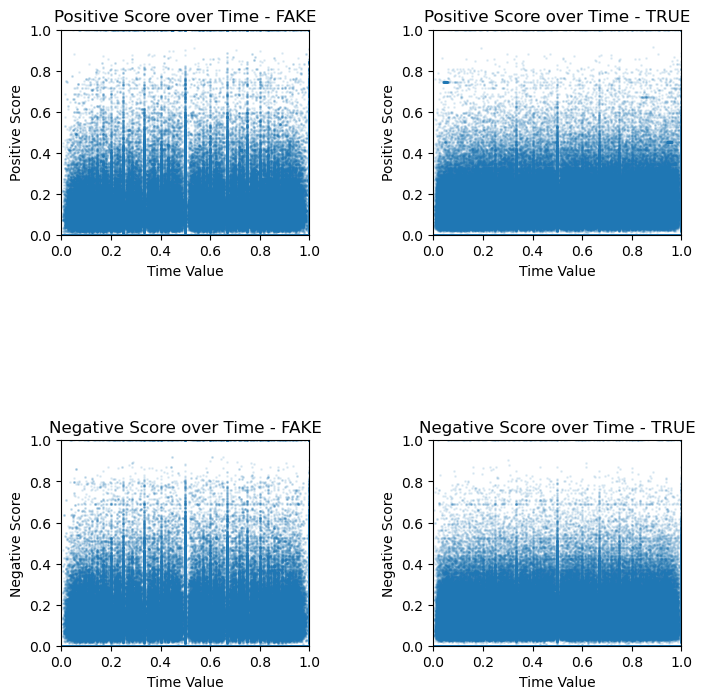

In [8]:
# Create an array of numbers from 1 to the max number of sentences
temp_arr_fake = np.arange(1, new_df_fake_compound.shape[1]).astype(np.uint16)
temp_arr_true = np.arange(1, new_df_true_compound.shape[1]).astype(np.uint16)

# Tile the array to create an array matching the cleaned dataset
index_temp_fake = np.tile(temp_arr_fake, (len(new_df_fake_compound), 1)).astype(np.uint16)
index_temp_true = np.tile(temp_arr_true, (len(new_df_true_compound), 1)).astype(np.uint16)

# Creating a standardized x value (Time Value) for each text block
first_nan_index_fake_compound = first_nan_index_fake_compound.reshape(len(index_temp_fake), 1)
index_temp_standardized_compound_fake = (index_temp_fake.astype(float) / first_nan_index_fake_compound.astype(float))
first_nan_index_fake_positive = first_nan_index_fake_positive.reshape(len(index_temp_fake), 1)
index_temp_standardized_positive_fake = (index_temp_fake.astype(float) / first_nan_index_fake_positive.astype(float))
first_nan_index_fake_negative = first_nan_index_fake_negative.reshape(len(index_temp_fake), 1)
index_temp_standardized_negative_fake = (index_temp_fake.astype(float) / first_nan_index_fake_negative.astype(float))

first_nan_index_true_compound = first_nan_index_true_compound.reshape(len(index_temp_true), 1)
index_temp_standardized_compound_true = (index_temp_true.astype(float) / first_nan_index_true_compound.astype(float))
first_nan_index_true_positive = first_nan_index_true_positive.reshape(len(index_temp_true), 1)
index_temp_standardized_positive_true = (index_temp_true.astype(float) / first_nan_index_true_positive.astype(float))
first_nan_index_true_negative = first_nan_index_true_negative.reshape(len(index_temp_true), 1)
index_temp_standardized_negative_true = (index_temp_true.astype(float) / first_nan_index_true_negative.astype(float))

fakes_sentiment_compound_score = new_df_fake_compound.drop(['Text Block'], axis=1).values
fakes_sentiment_positive_score = new_df_fake_positive.drop(['Text Block'], axis=1).values
fakes_sentiment_negative_score = new_df_fake_negative.drop(['Text Block'], axis=1).values

trues_sentiment_compound_score = new_df_true_compound.drop(['Text Block'], axis=1).values
trues_sentiment_positive_score = new_df_true_positive.drop(['Text Block'], axis=1).values
trues_sentiment_negative_score = new_df_true_negative.drop(['Text Block'], axis=1).values


plt.subplots(figsize=(8,8))

plt.subplot(221)
plt.scatter(index_temp_standardized_positive_fake.ravel(), fakes_sentiment_positive_score.ravel(), s=1, alpha=0.1)
plt.title("Positive Score over Time - FAKE")
plt.ylim([0,1]) # Set y-axis limits to match range of sentiment scores
plt.xlim([0,1])
plt.xlabel('Time Value')
plt.ylabel('Positive Score')

plt.subplot(222)
plt.scatter(index_temp_standardized_positive_true.ravel(), trues_sentiment_positive_score.ravel(), s=1, alpha=0.1)
plt.title("Positive Score over Time - TRUE")
plt.ylim([0,1]) # Set y-axis limits to match range of sentiment scores
plt.xlim([0,1])
plt.xlabel('Time Value')
plt.ylabel('Positive Score')

plt.subplot(223)
plt.scatter(index_temp_standardized_negative_fake.ravel(), fakes_sentiment_negative_score.ravel(), s=1, alpha=0.1)
plt.title("Negative Score over Time - FAKE")
plt.ylim([0,1]) # Set y-axis limits to match range of sentiment scores
plt.xlim([0,1])
plt.xlabel('Time Value')
plt.ylabel('Negative Score')

plt.subplot(224)
plt.scatter(index_temp_standardized_negative_true.ravel(), trues_sentiment_negative_score.ravel(), s=1, alpha=0.1)
plt.title("Negative Score over Time - TRUE")
plt.ylim([0,1]) # Set y-axis limits to match range of sentiment scores
plt.xlim([0,1])
plt.xlabel('Time Value')
plt.ylabel('Negative Score')

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=1)

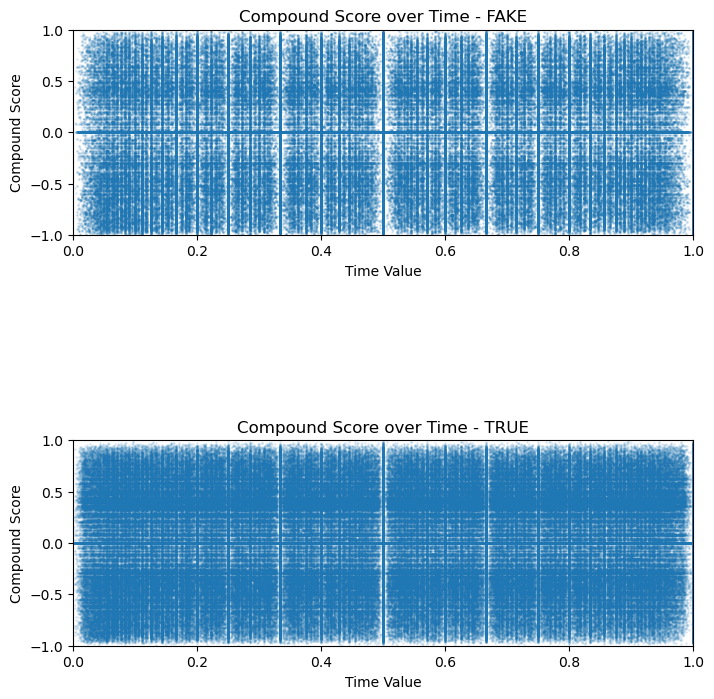

In [9]:
plt.subplots(figsize=(8,8))
plt.subplot(211)
plt.scatter(index_temp_standardized_compound_fake.ravel(), fakes_sentiment_compound_score.ravel(), s=1, alpha=0.1)
plt.title("Compound Score over Time - FAKE")
plt.ylim([-1,1]) # Set y-axis limits to match range of sentiment scores
plt.xlim([0,1])
plt.xlabel('Time Value')
plt.ylabel('Compound Score')

plt.subplot(212)
plt.scatter(index_temp_standardized_compound_true.ravel(), trues_sentiment_compound_score.ravel(), s=1, alpha=0.1)
plt.title("Compound Score over Time - TRUE")
plt.ylim([-1,1]) # Set y-axis limits to match range of sentiment scores
plt.xlim([0,1])
plt.xlabel('Time Value')
plt.ylabel('Compound Score')

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=1)

Closer inspection of the compound score shows that for both FAKE and TRUE texts, there is a tendency to spread out to the extremes (-1 meaning negative and 1 meaning positive), but even more so with FAKE texts. 
Let us confirm by using simplifying the graphs.

In [11]:
# grouped_means_true = np.array([trues_sentiment_compound_score.ravel()[index_temp_standardized_compound_true.ravel() == i].mean() for i in np.unique(index_temp_standardized_compound_true.ravel())])
# grouped_means_fake = np.array([fakes_sentiment_compound_score.ravel()[index_temp_standardized_compound_fake.ravel() == i].mean() for i in np.unique(index_temp_standardized_compound_fake.ravel())])

# # Open a file for writing and storing the grouped datasets with different breakdowns
# with open('avg_by_time_FAKE.txt', 'w', encoding='utf-8') as f:
    
#    # Loop through the list and write each element to a new line in the file
#    for row in grouped_means_fake:
#        f.write(str(row) + '\n')
    
# # Open a file for writing and storing the cleaned dataset with language
# with open('avg_by_time_TRUE.txt', 'w', encoding='utf-8') as f:
    
#    # Loop through the list and write each element to a new line in the file
#    for row in grouped_means_true:
#        f.write(str(row) + '\n')

The code block above outputs two different aggregations of the sentiment scores used for this report:
1. Sentiment scores by Time, and
2. Sentiment scores by Text Block

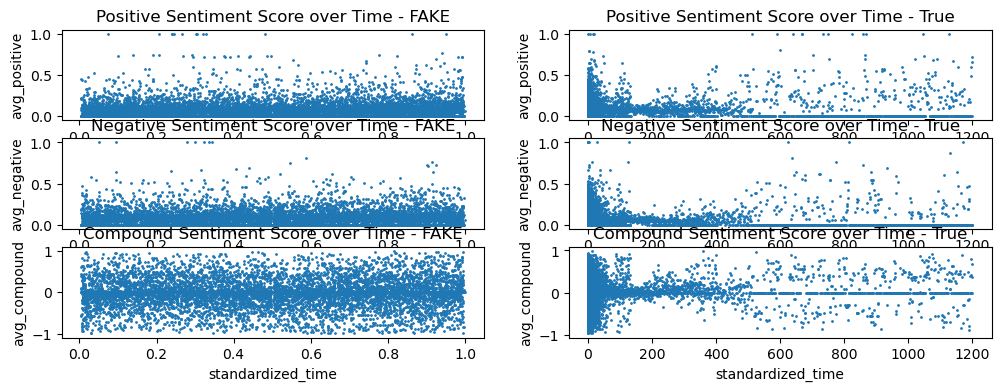

<Figure size 640x480 with 0 Axes>

In [36]:
# Read the CSV files of sentiment scores into a pandas DataFrame
df_scoresbyTime__fake = pd.read_csv('sentiments_scores_Fake__byTimeOnly.csv')
df_scoresbyTime__true = pd.read_csv('sentiments_scores_True__byTimeOnly.csv')
df_scoresbyTextBlock__fake = pd.read_csv('sentiments_scores_Fake__bytextblock.csv')
df_scoresbyTextBlock__true = pd.read_csv('sentiments_scores_True__bytextblock.csv')

plt.rcParams['agg.path.chunksize'] = 10000

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 4))
#fig.subplots_adjust(wspace=5, hspace=5)

df_scoresbyTime__fake.plot(kind='scatter', x='standardized_time', y='avg_positive', title='Positive Sentiment Score over Time - FAKE', ax=axs[0,0], s=1)
df_scoresbyTime__true.plot(kind='scatter', x='standardized_time', y='avg_positive', title='Positive Sentiment Score over Time - True', ax=axs[0,1], s=1)
df_scoresbyTime__fake.plot(kind='scatter', x='standardized_time', y='avg_negative', title='Negative Sentiment Score over Time - FAKE', ax=axs[1,0], s=1)
df_scoresbyTime__true.plot(kind='scatter', x='standardized_time', y='avg_negative', title='Negative Sentiment Score over Time - True', ax=axs[1,1], s=1)
df_scoresbyTime__fake.plot(kind='scatter', x='standardized_time', y='avg_compound', title='Compound Sentiment Score over Time - FAKE', ax=axs[2,0], s=1)
df_scoresbyTime__true.plot(kind='scatter', x='standardized_time', y='avg_compound', title='Compound Sentiment Score over Time - True', ax=axs[2,1], s=1)

plt.show()
plt.tight_layout()

As seen from the graphs, chronologically, Fake articles tend to start and stay on a substantially higher "non-neutral" tone than the True articles, which start at a heightened "non-neutral" tone then converges to a neutral tone.

<AxesSubplot:title={'center':'Compound Sentiment Score over Time - TRUE'}, xlabel='text_block', ylabel='avg_compound'>

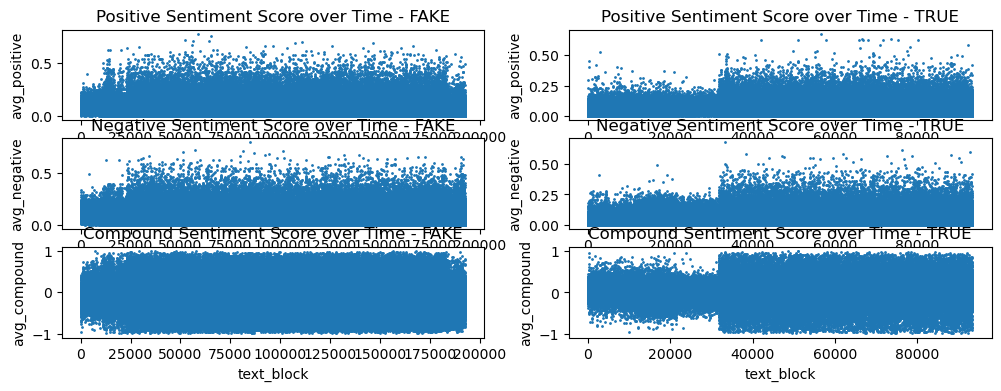

In [44]:
plt.rcParams['agg.path.chunksize'] = 10000

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 4))

df_scoresbyTextBlock__fake.plot(kind='scatter', x='text_block', y='avg_positive', title='Positive Sentiment Score over Time - FAKE', ax=axs[0,0], s=1)
df_scoresbyTextBlock__true.plot(kind='scatter', x='text_block', y='avg_positive', title='Positive Sentiment Score over Time - TRUE', ax=axs[0,1], s=1)
df_scoresbyTextBlock__fake.plot(kind='scatter', x='text_block', y='avg_negative', title='Negative Sentiment Score over Time - FAKE', ax=axs[1,0], s=1)
df_scoresbyTextBlock__true.plot(kind='scatter', x='text_block', y='avg_negative', title='Negative Sentiment Score over Time - TRUE', ax=axs[1,1], s=1)
df_scoresbyTextBlock__fake.plot(kind='scatter', x='text_block', y='avg_compound', title='Compound Sentiment Score over Time - FAKE', ax=axs[2,0], s=1)
df_scoresbyTextBlock__true.plot(kind='scatter', x='text_block', y='avg_compound', title='Compound Sentiment Score over Time - TRUE', ax=axs[2,1], s=1)

For these graphs, the order of the x-axis does not mean anything outside of the order of the articles' arbitrary text block index. However, we can see that there are generally higher values for the fake articles compared to real articles.

**Sentiment Analysis Conclusion**

In [69]:
SentimentScoresCompound_byTextBlock__fake_std = df_scoresbyTextBlock__fake['avg_compound'].std()
SentimentScoresPositive_byTextBlock__fake_std = df_scoresbyTextBlock__fake['avg_positive'].std()
SentimentScoresNegative_byTextBlock__fake_std = df_scoresbyTextBlock__fake['avg_negative'].std()
SentimentScoresCompound_byTextBlock__fake_avg = df_scoresbyTextBlock__fake['avg_compound'].mean()
SentimentScoresPositive_byTextBlock__fake_avg = df_scoresbyTextBlock__fake['avg_positive'].mean()
SentimentScoresNegative_byTextBlock__fake_avg = df_scoresbyTextBlock__fake['avg_negative'].mean()

SentimentScoresCompound_byTextBlock__true_std = df_scoresbyTextBlock__true['avg_compound'].std()
SentimentScoresCompound_byTextBlock__true_avg = df_scoresbyTextBlock__true['avg_compound'].mean()
SentimentScoresPositive_byTextBlock__true_std = df_scoresbyTextBlock__true['avg_positive'].std()
SentimentScoresPositive_byTextBlock__true_avg = df_scoresbyTextBlock__true['avg_positive'].mean()
SentimentScoresNegative_byTextBlock__true_std = df_scoresbyTextBlock__true['avg_negative'].std()
SentimentScoresNegative_byTextBlock__true_avg = df_scoresbyTextBlock__true['avg_negative'].mean()

print(SentimentScoresCompound_byTextBlock__fake_std)
print(SentimentScoresCompound_byTextBlock__fake_avg)
print(SentimentScoresPositive_byTextBlock__fake_std)
print(SentimentScoresPositive_byTextBlock__fake_avg)
print(SentimentScoresNegative_byTextBlock__fake_std)
print(SentimentScoresNegative_byTextBlock__fake_avg)
print('\n')
print(SentimentScoresCompound_byTextBlock__true_std)
print(SentimentScoresCompound_byTextBlock__true_avg)
print(SentimentScoresPositive_byTextBlock__true_std)
print(SentimentScoresPositive_byTextBlock__true_avg)
print(SentimentScoresNegative_byTextBlock__true_std)
print(SentimentScoresNegative_byTextBlock__true_avg)

0.3356144355819258
-0.0156768393447543
0.07958260561312994
0.07176072424751177
0.08506560859512532
0.07384667488191145


0.29893114170209234
0.0214773462230209
0.06598579396780793
0.06835110085945086
0.06754422402101556
0.06110576692497399


From the sentiment analysis, it can be concluded that Fake articles tend to have more non-neutral tones (ie. more extreme towards positive or negative), as demonstrated by the graphs and the lower values for mean scores in the three categories of: Compound, Negative, Positive.

Pennycook and Rand's article explores the psychological characteristics of individuals who are more susceptible to believing fake news. Their study reveals that those with a tendency to accept weak claims, a trait known as reflexive open-mindedness, are more likely to perceive fake news as accurate. This is consistent with our own findings from sentiment analysis, which highlight heightened emotions as a driving factor enticing these individuals for fake news. The study also expands on previous research by demonstrating that the relationship between analytic thinking and perceived accuracy is not influenced by factors such as the source of the headline or familiarity with it. Based on our findings, true articles appear to use more neutral language coding, where these article prioritize neutrality and objectivity in their language use. 

## Data Cleaning (Clustering)

Next, we do more of the data cleaning process for clustering, including removing stop words, numbers, punctuation, white spaces and converting the dataset to lowercase letters.

In [45]:
# Read in the text file
with open('DataSet_Misinfo_FAKE__cleaned.txt', 'r', encoding='utf8', errors='ignore') as file:
    text = file.read(100000) # Subsets to the first 100,000 characters of the file

In [48]:
# Tokenize the text
words = nltk.word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.casefold() not in stop_words]

# Remove numbers and punctuation
table = str.maketrans('', '', string.punctuation + string.digits)
stripped_words = [word.translate(table) for word in filtered_words]

# Strip white space and convert to lowercase
final_words = [word.strip().lower() for word in stripped_words]

# Stem the words
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in final_words]

## Dendrogram
Before creating the dendrogram, we first create a document-term matrix (DTM) to help visualize and get a better picture  of the frequency of words within the document. After creating the DTM, we sort the data-frame by the top 20 most frequently used words in the document.

In [49]:
# Create a document-term matrix
cv = CountVectorizer()
dtm = cv.fit_transform(stemmed_words)
df_dtm = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())

# Calculate the sum of each term's frequency across all documents
freq = np.ravel(dtm.sum(axis=0))

# Create a DataFrame with terms and their frequency
freq_dict = {'Term': cv.get_feature_names_out(), 'Frequency': freq}
df_freq = pd.DataFrame(freq_dict)

# Sort the DataFrame in descending order of frequency and get the top 20 terms
top_20 = df_freq.sort_values(by='Frequency', ascending=False).head(20)
print(top_20)

            Term  Frequency
2638       trump        226
611       decemb        109
1946      presid         66
715       donald         63
1194        imag         60
1818       peopl         54
2243       senat         52
1599        moor         47
2845        year         45
1432        like         45
889          fbi         44
783           en         42
1723         one         40
821         even         37
2189        said         35
2206         say         35
2115  republican         34
2651       tweet         33
2833       would         33
1011         get         32


We can visualize this further by plotting the top terms on a bar graph:

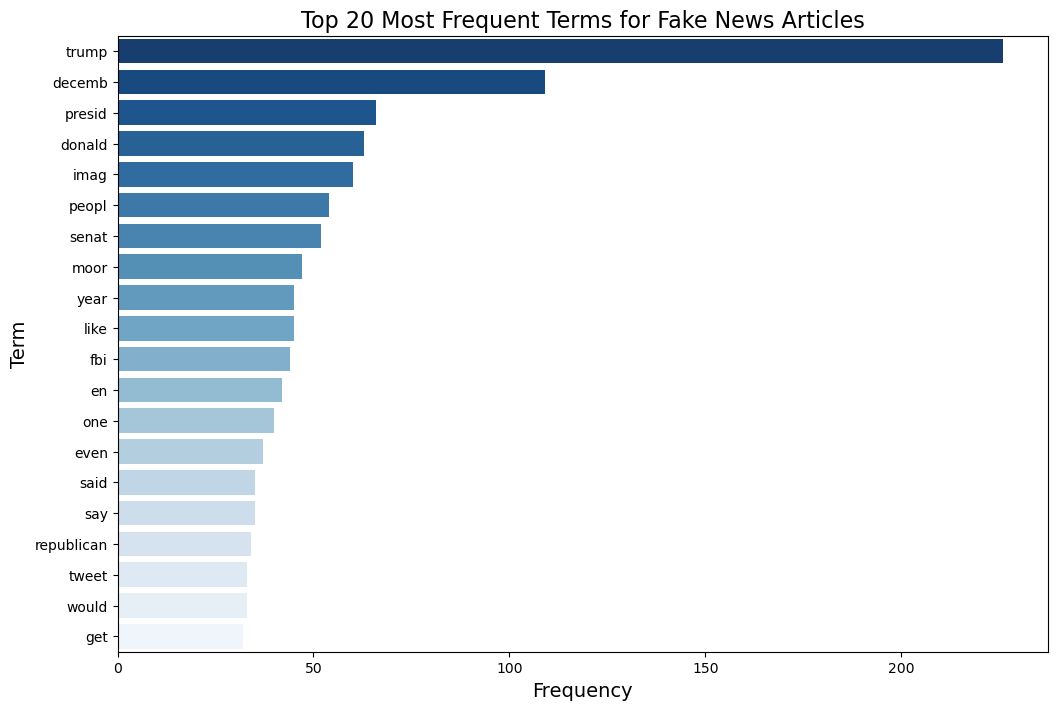

In [50]:
# Set the color map
colors = sns.color_palette('Blues', len(top_20))[::-1]

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Frequency', y='Term', data=top_20, palette=colors)

# Set the labels and title
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Term', fontsize=14)
ax.set_title('Top 20 Most Frequent Terms for Fake News Articles', fontsize=16)

# Show the plot
plt.show()

Based on our analysis, the top terms in fake news articles are "Trump," "December," and "president." These findings suggest that fake news articles often center around the statements and actions of former President Donald Trump, and political news is a common theme. Interestingly, "December" is the second most frequent term, which could be attributed to plenty of specific events or news stories that occur during that month in a particular year. The frequent use of words such as "even," "said," and "say" implies that fake news articles often rely on quotes and attributions to increase credibility.

It is worth noting that the word cutoff could be attributed to stemming or improper data cleaning, and further analysis is necessary to address this issue. Overall, our analysis indicates that fake news articles tend to focus on political topics, particularly those related to Donald Trump, and often use quotes and attributions to enhance credibility.

Given the large size of the dataset, it may be necessary to approach the problem differently. We constructed a dendrogram using the 50 most frequent terms.

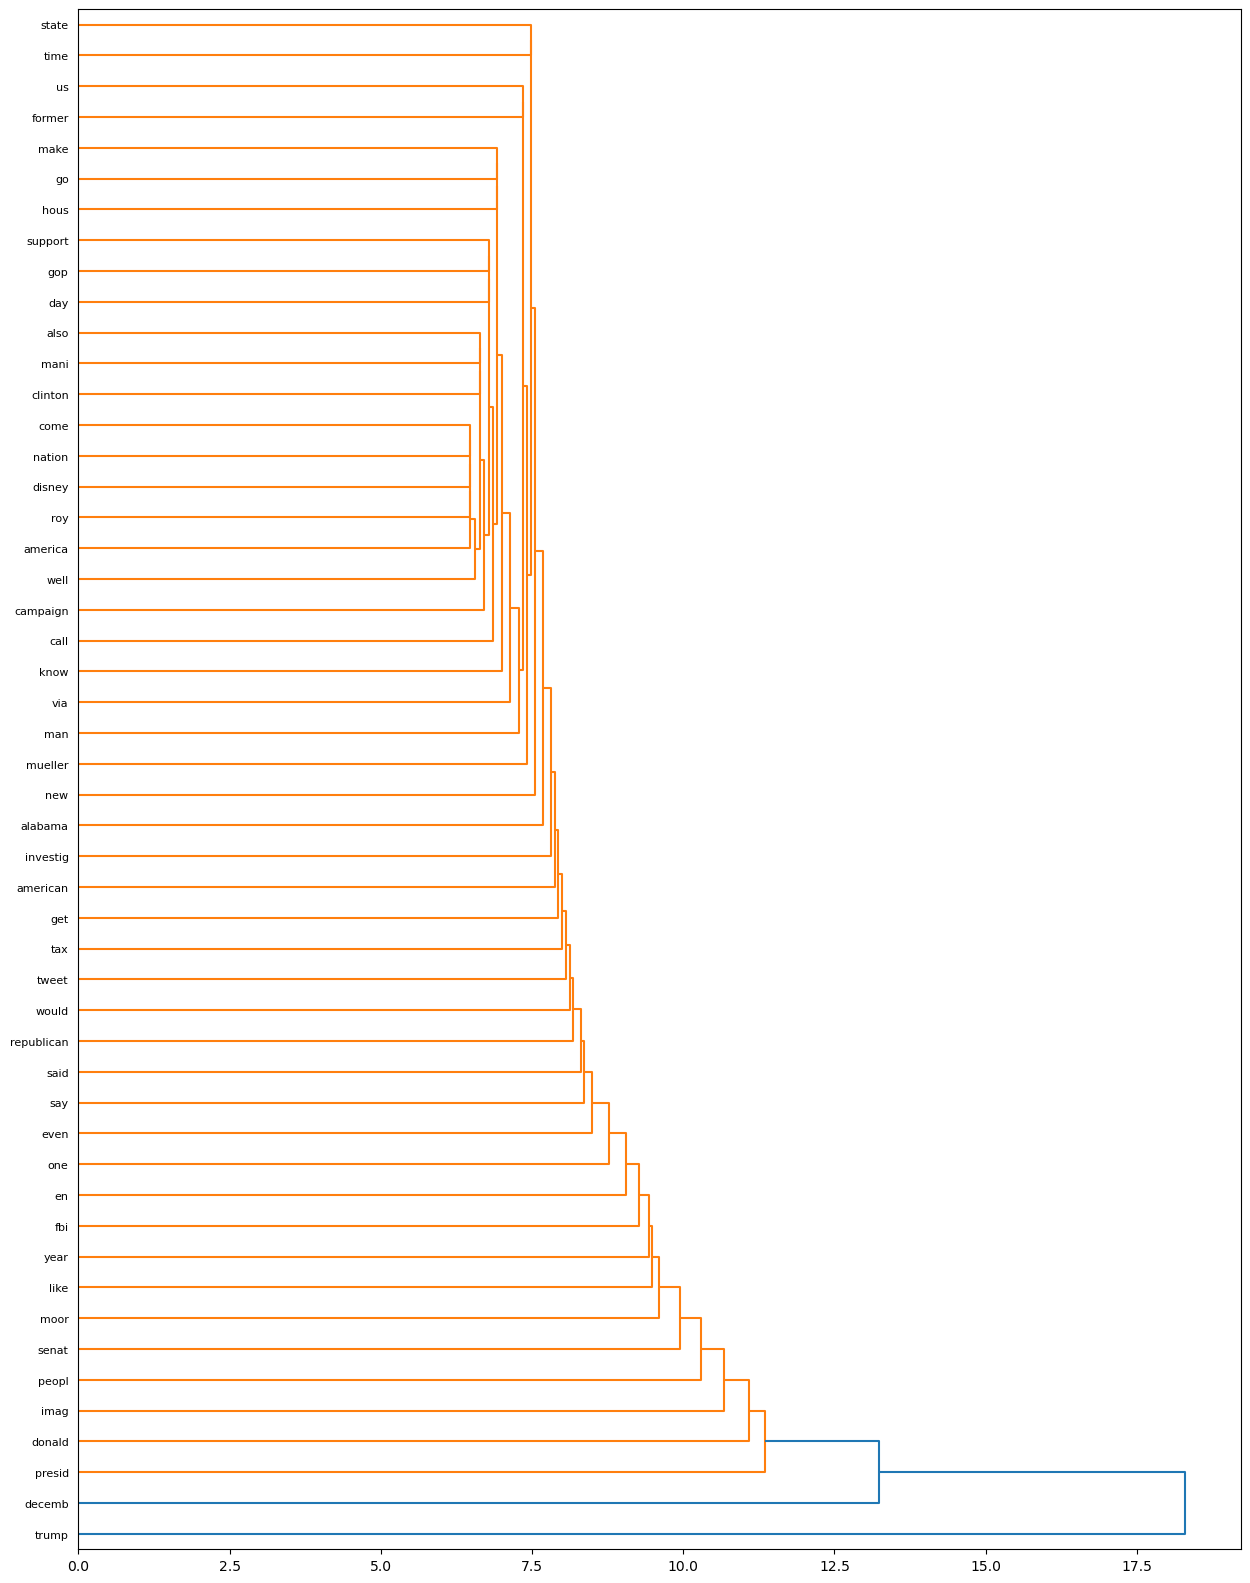

In [51]:
# Get the top 50 most frequent words
top_words = df_dtm.sum().sort_values(ascending=False)[:50].index
df_top_words = df_dtm[top_words]

# Remove missing values
df_top_words = df_top_words.copy()
df_top_words.dropna(inplace=True)

# Calculate the pairwise distances using Euclidean distance
dist = pdist(df_top_words.T, metric='euclidean')

# Apply complete linkage clustering
linkage_matrix = linkage(dist, method='complete')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(15, 20))
_ = dendrogram(linkage_matrix, labels=list(df_top_words.columns), orientation='right', ax=ax)
plt.show()

Based on the dendrogram, "trump" and "decemb" (December) have a higher branch length compared to the other words in the dendrogram. Moreover, "trump" appears to be a distinct outlier, not belonging to any of the main clusters until a cutoff point of more than 17.5. This finding suggests that "trump" is significantly different from the other words in terms of frequency of occurance, a finding that is corroborated by the bar graph of frequently used terms.

##### Note:
The dendrogram was constructed using Euclidean distance as a measure. However, this approach has some limitations. Firstly, Euclidean distance is sensitive to the length of vectors, which may result in misleading outcomes when the lengths of the documents vary. Additionally, Euclidean distance assumes normal data distribution, which is unlikely in the case of our text analysis, where the data is sparse and high-dimensional. Despite these limitations, we chose to use Euclidean distance because it is an intuitive measure of distance and easier to interpret. Further investigation into alternative distance measures may be warranted to identify the optimal approach for constructing the dendrogram. Ultimately, the dendrogram provides a comprehensive view of how words cluster together in the context of fake news articles. However, given the scope of the dataset, this method may not be the best approach for deriving insights. As an alternative, we propose using a network graph.

## Network Graph
Additionally, we may opt to visualize the data using a Network Graph as a result of the sparse nature of the dataset. Our intent is to help visualize the connections between the top key words and how fake articles may use these words in collision to entice potential readers.

<IPython.core.display.Javascript object>


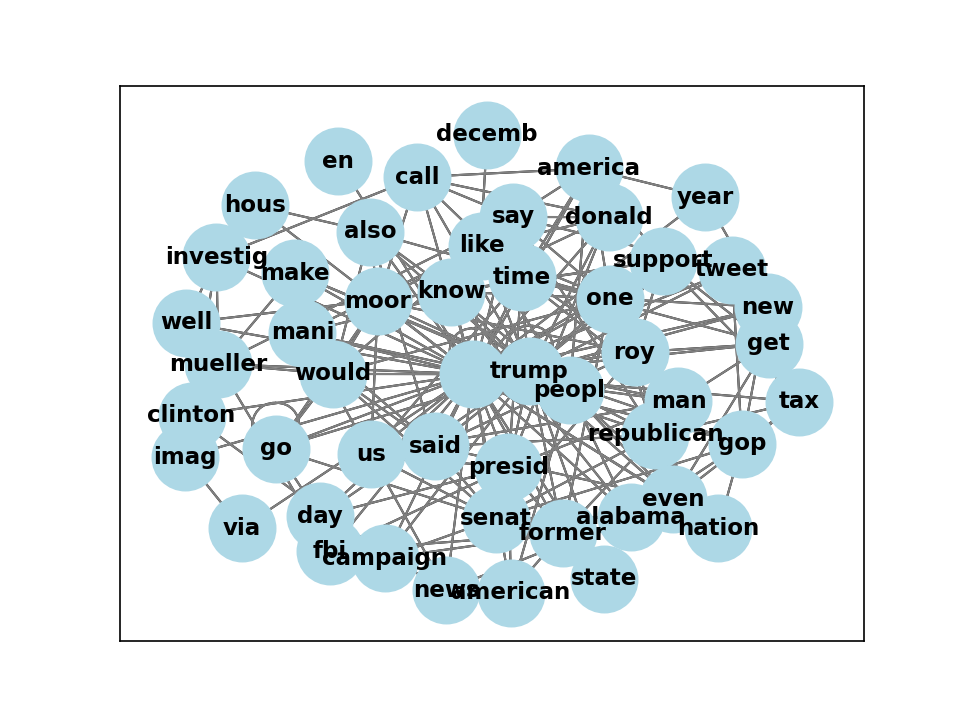

In [52]:
%matplotlib notebook
# Count the frequency of each word
word_counts = collections.Counter(stemmed_words)

# Get the top 50 words
top_words = [word for word, count in word_counts.most_common(50)]

# Define the edges using only the top 50 words
edges = []
for i in range(1, len(stemmed_words)):
    if stemmed_words[i-1] in top_words and stemmed_words[i] in top_words:
        edge = (stemmed_words[i-1], stemmed_words[i])
        edges.append(edge)
    
# Create the graph
graph = nx.Graph()

# Add the edges
graph.add_edges_from(edges)

# Set the layout
pos = nx.kamada_kawai_layout(graph)

# Plot the graph
nx.draw_networkx(graph, pos=pos, with_labels=False)
nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(graph, pos, edge_color='grey')
nx.draw_networkx_labels(graph, pos, font_size=11, font_weight='bold')

# Show the plot
plt.show()

There are a couple takeaways we can pull from this graph:
##### The word "say" can be linked to words like "donald", "america", "time", and "republican".
- The link suggests that the articles may contain quotations or attributed statements that use these words to appear more credible or to support a specific narrative.
##### "Senate" is linked with "campaign", "american", and "state".
- The link suggests that articles may be more focuses on political motifs, with a focus on specific states or the American electorate as a whole.
##### "Trump" appears to have the most connections to many of the words.
- This link suggests that he may be a central figure or be a common subject of discussion.

Interestingly, "america" and "donald" do not appear to have a strong connection based on the graph. More analysis is required to further understand these relationships.

# Wordcloud
We may also visualize the frequency of words and terms through a wordcloud visual. 

<IPython.core.display.Javascript object>


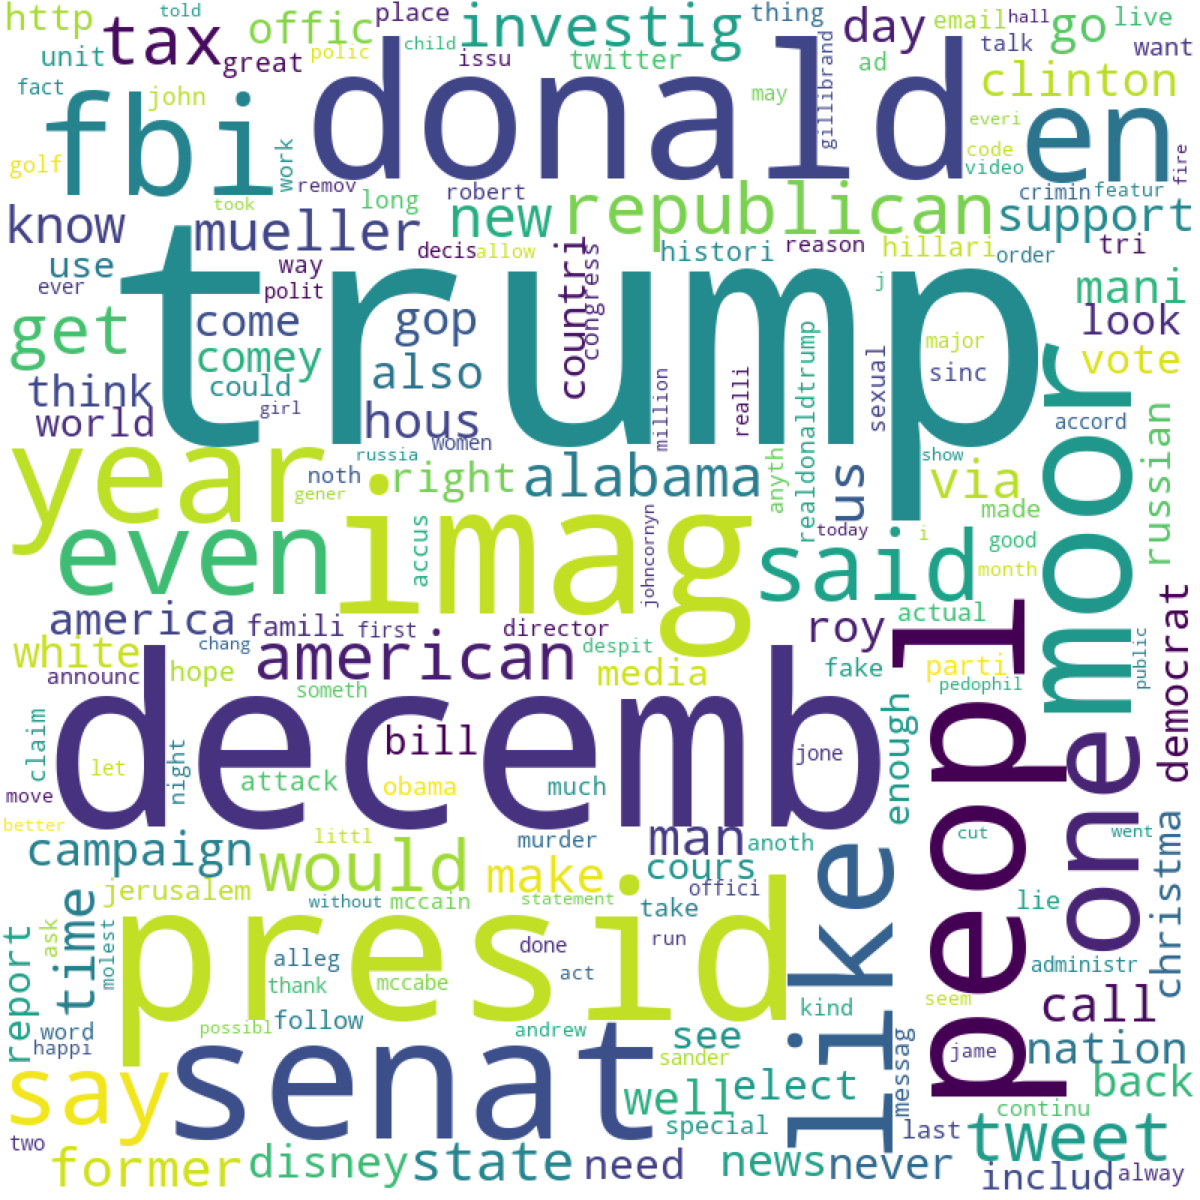

In [53]:
# Create a wordcloud
word_freq = Counter(stemmed_words)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Real Dataset Analysis
Analyzing the real dataset will enable us to see the differences between the tendencies of words used in real vs fake articles.

In [54]:
# Read in the text file
with open('DataSet_Misinfo_TRUE__cleaned.txt', 'r', encoding='utf8', errors='ignore') as file:
    text = file.read(100000) # Subsets to the first 100,000 characters of the file

In [55]:
# Tokenize the text
words = nltk.word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.casefold() not in stop_words]

# Remove numbers and punctuation
table = str.maketrans('', '', string.punctuation + string.digits)
stripped_words = [word.translate(table) for word in filtered_words]

# Interestingly, stripped_words refuses to removed closing and opening quotation marks, we have to do this manually.
stripped_words = [word.replace('“', '') for word in stripped_words]
stripped_words = [word.replace('”', '') for word in stripped_words]
stripped_words = [word.replace("’", '') for word in stripped_words]
stripped_words = [word.replace("‘", '') for word in stripped_words]

# Strip white space and convert to lowercase
final_words = [word.strip().lower() for word in stripped_words]

# Stem the words
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in final_words]

## Dendrogram

In [56]:
# Create a document-term matrix
cv = CountVectorizer()
dtm = cv.fit_transform(stemmed_words)
df_dtm = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())

# Calculate the sum of each term's frequency across all documents
freq = np.ravel(dtm.sum(axis=0))

# Create a DataFrame with terms and their frequency
freq_dict = {'Term': cv.get_feature_names_out(), 'Frequency': freq}
df_freq = pd.DataFrame(freq_dict)

# Sort the DataFrame in descending order of frequency and get the top 20 terms
top_20 = df_freq.sort_values(by='Frequency', ascending=False).head(20)
print(top_20)

            Term  Frequency
1783        said        181
2115       trump        177
2165          us        124
1700  republican         74
1944       state         71
1555      presid         65
460        court         63
532     democrat         62
957         hous         58
1350         new         56
2266       would         53
656           en         51
1397       offic         49
2279        year         48
29     administr         47
216         bill         45
2030         tax         45
78          also         43
1087        judg         42
1773        rule         41


<IPython.core.display.Javascript object>


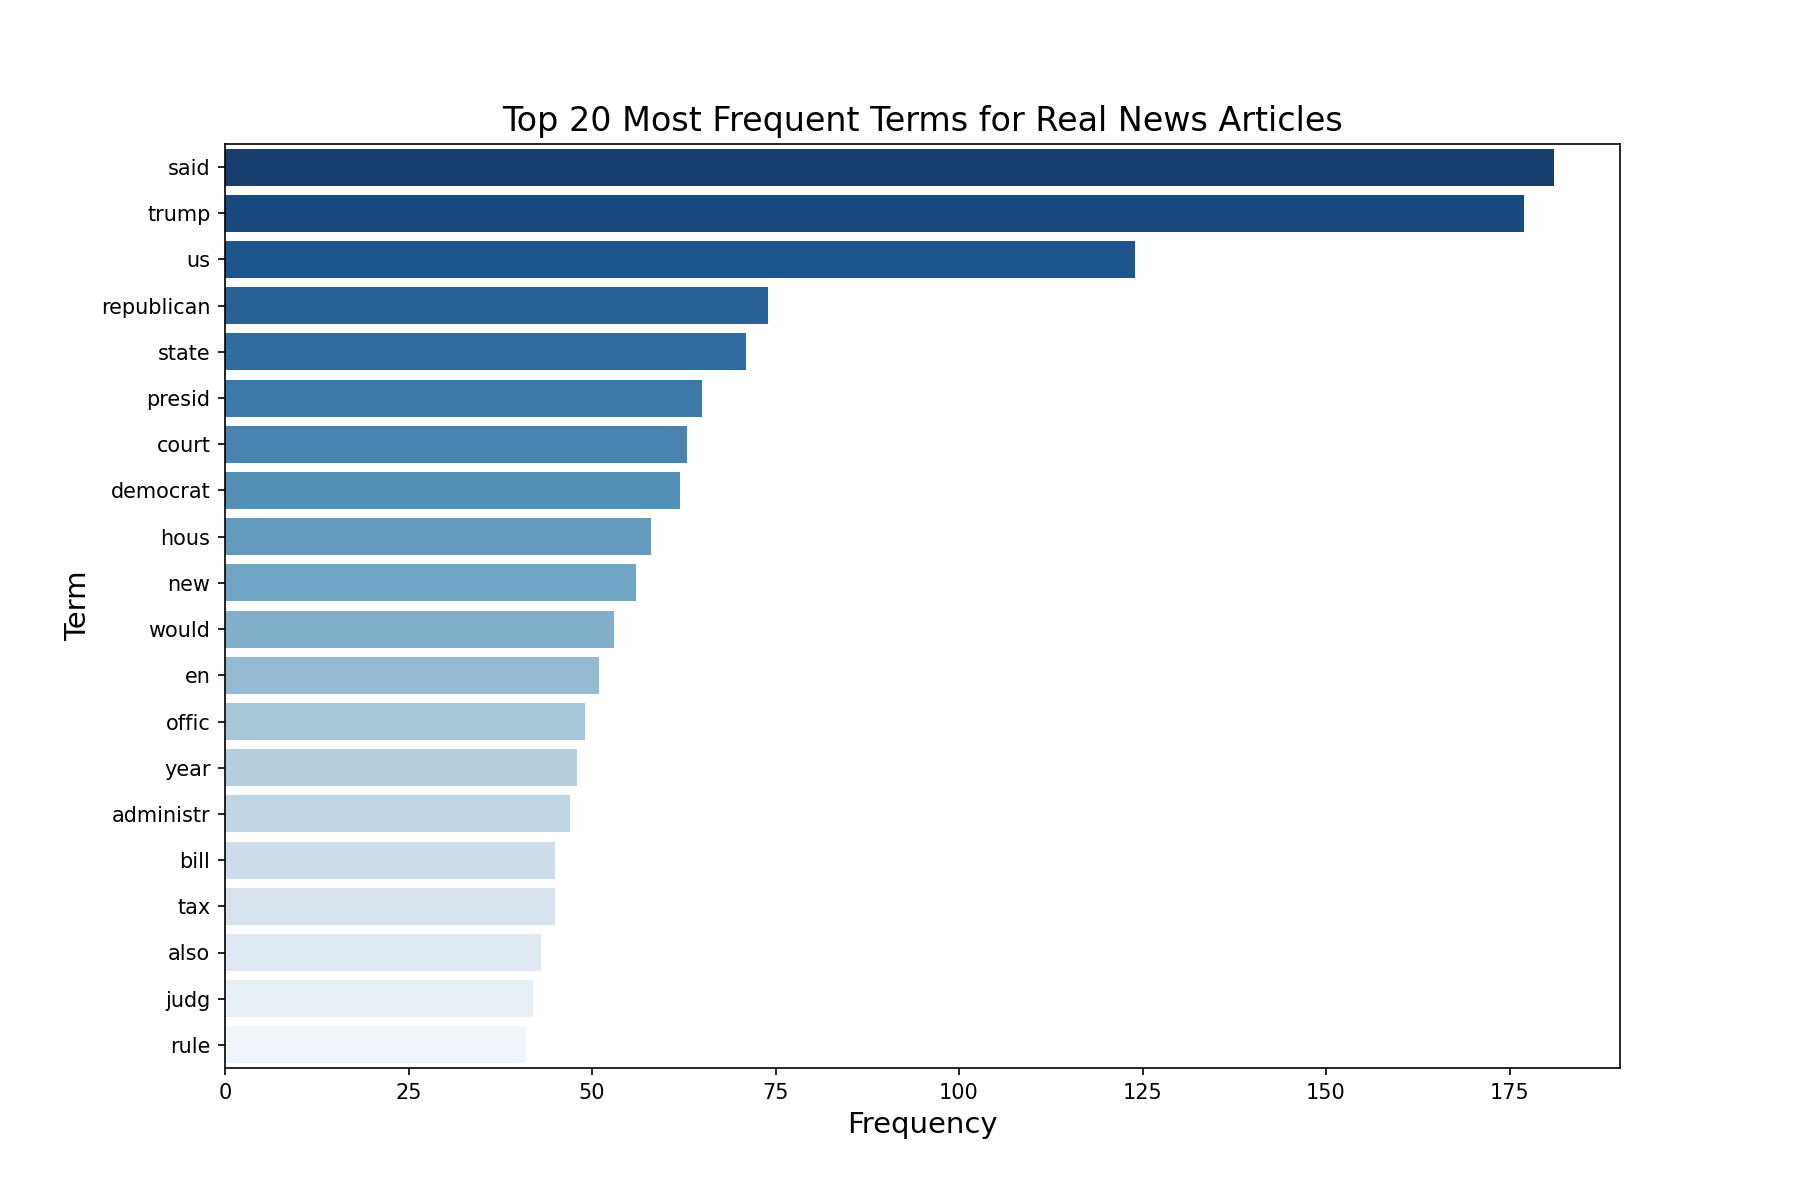

In [57]:
# Set the color map
colors = sns.color_palette('Blues', len(top_20))[::-1]

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Frequency', y='Term', data=top_20, palette=colors)

# Set the labels and title
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Term', fontsize=14)
ax.set_title('Top 20 Most Frequent Terms for Real News Articles', fontsize=16)

# Show the plot
plt.show()

The word "said" is the most frequent term for real news articles. This may suggest that articles may contain a lot of direct quotations or attributed statements from sources. The second most frequent term, "trump", indicates that these articles may focus on actions, policies, or statements of former President Donald Trump. Finally, other common terms on the list such as "republican", "state", and "president" may suggest that articles cover political and legal topics, like elections, government policies, and court decisions. 

We continue our analysis with the dendrogram:

<IPython.core.display.Javascript object>


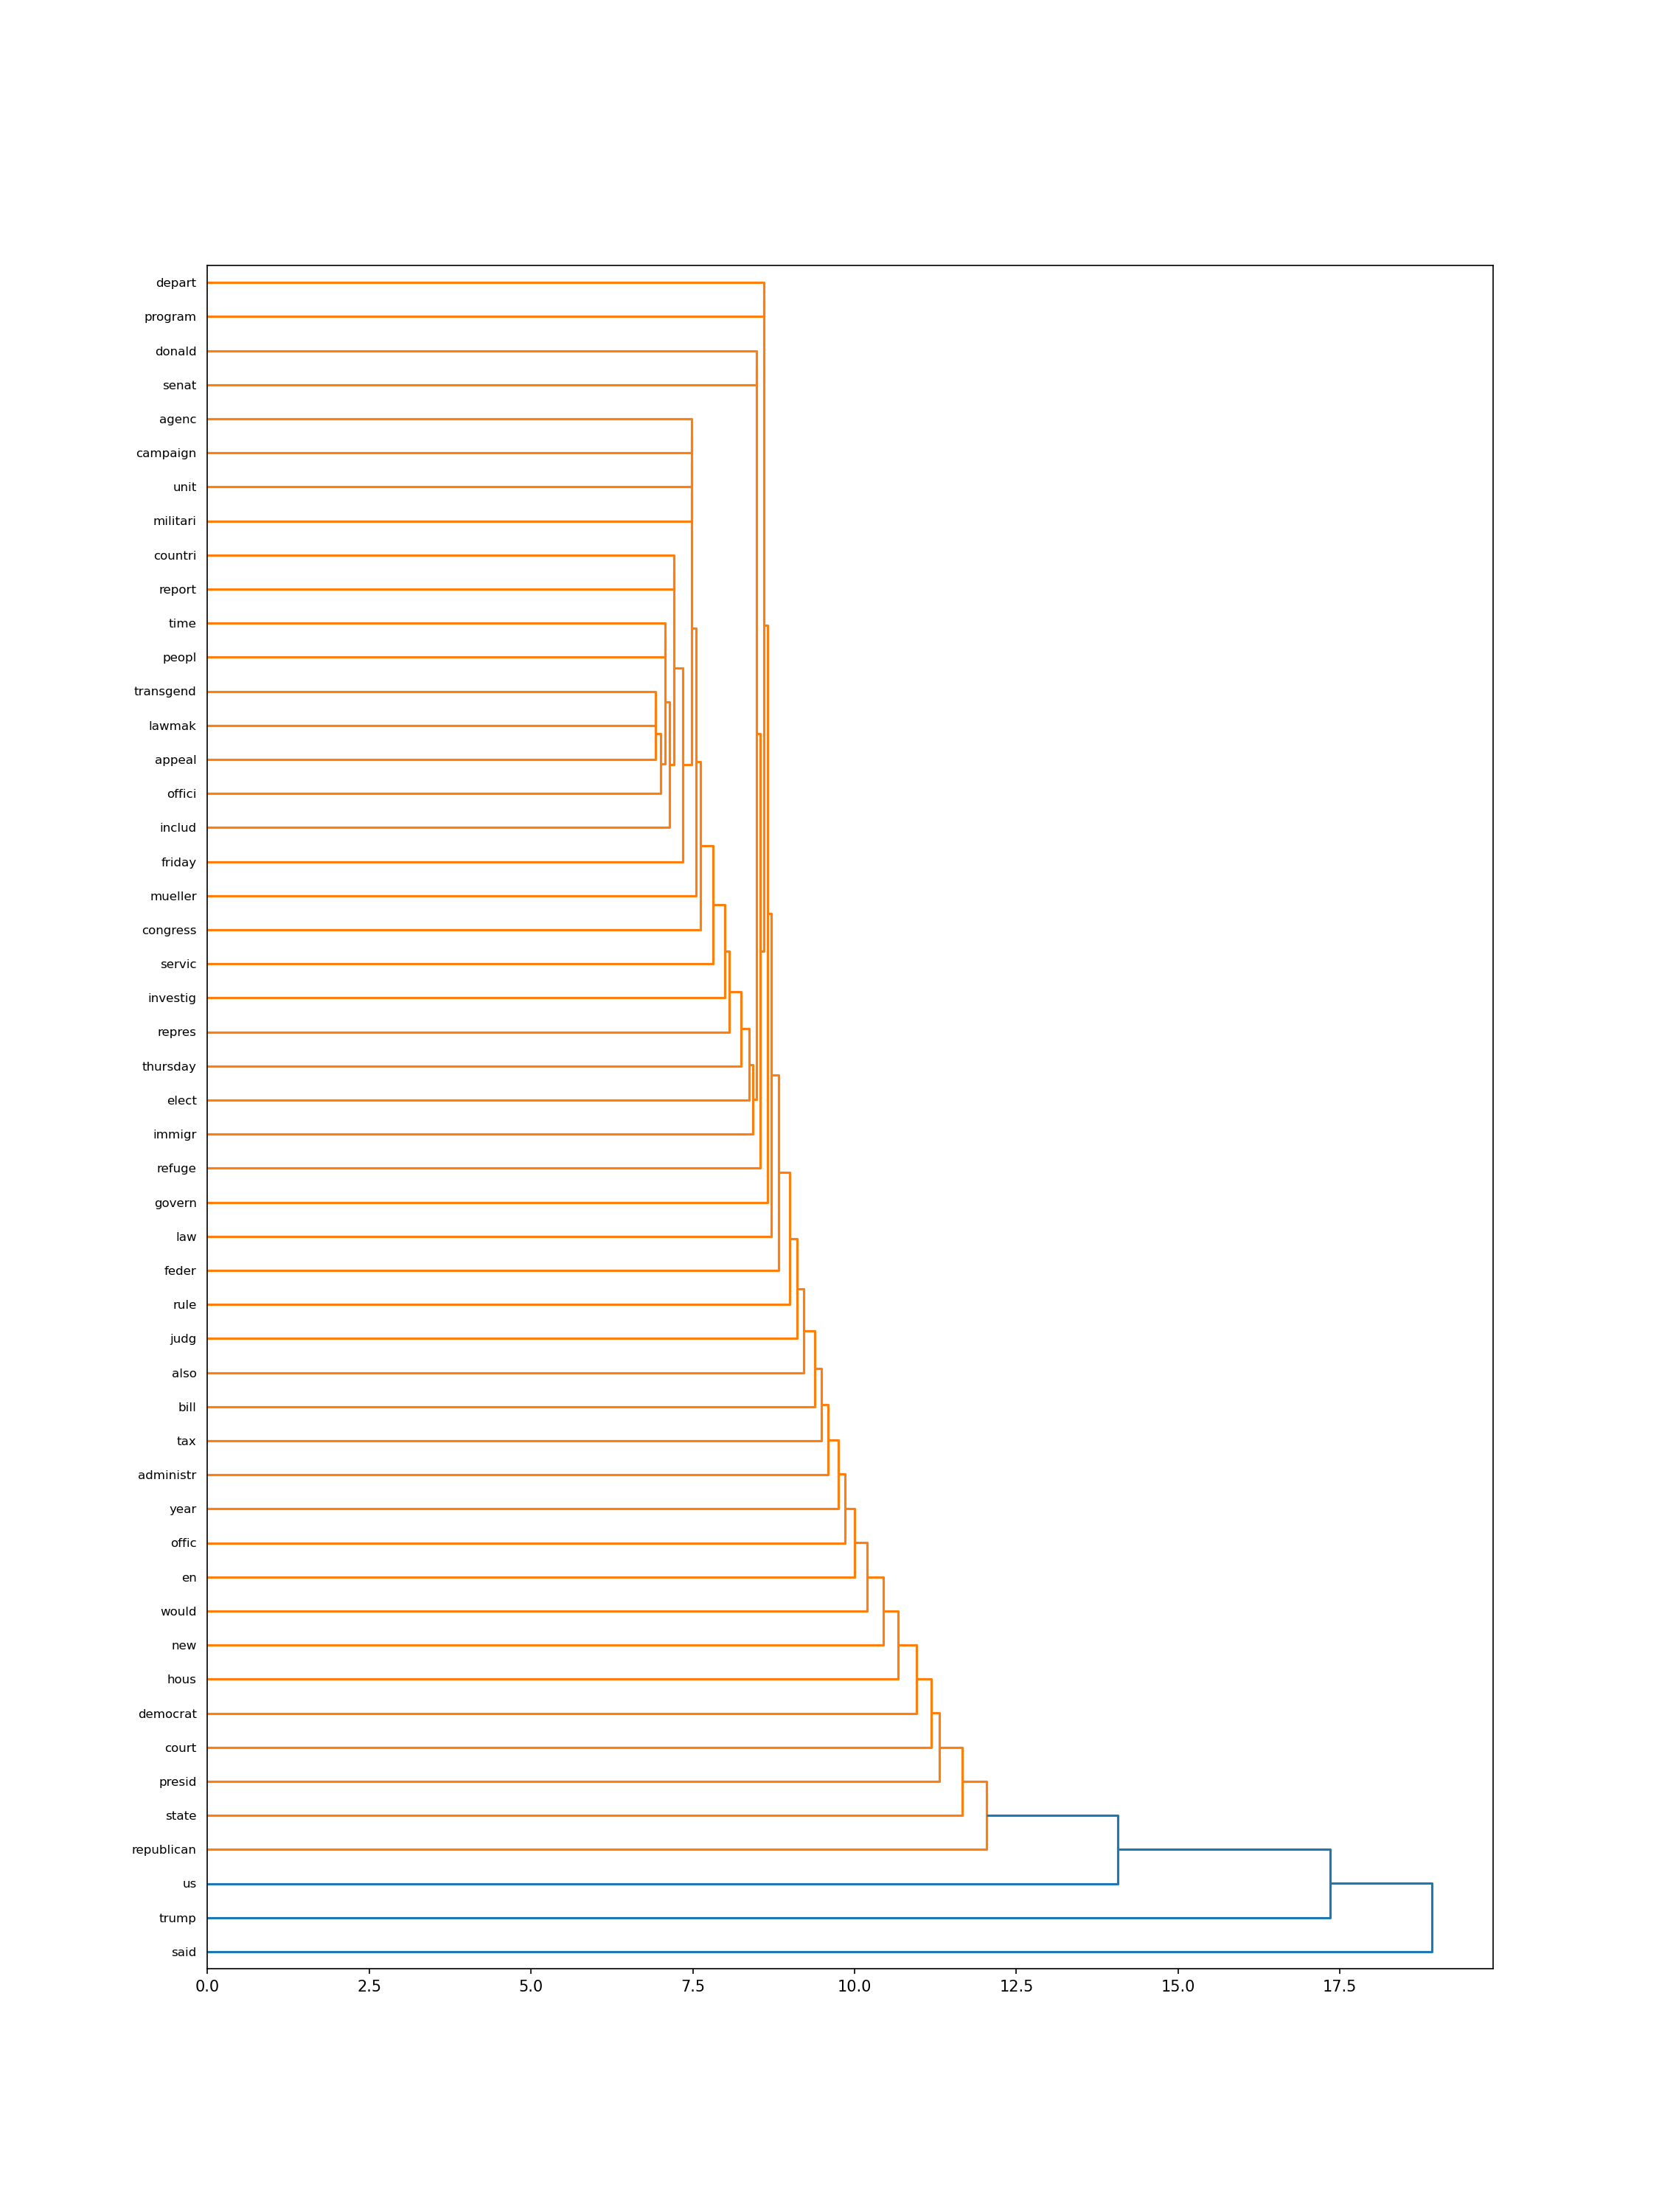

In [58]:
# Get the top 50 most frequent words
top_words = df_dtm.sum().sort_values(ascending=False)[:50].index
df_top_words = df_dtm[top_words]

# Remove missing values
df_top_words = df_top_words.copy()
df_top_words.dropna(inplace=True)

# Calculate the pairwise distances using Euclidean distance
dist = pdist(df_top_words.T, metric='euclidean')

# Apply complete linkage clustering
linkage_matrix = linkage(dist, method='complete')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(15, 20))
dn = dendrogram(linkage_matrix, labels=list(df_top_words.columns), orientation='right', ax=ax)
plt.show()

Based on the dendrogram, "said" and "trump" have a higher branch length compared to the other words in the dendrogram. Similar to the previous dendrogram, said (and trump) appears to be a distinct outlier, not belonging to any of the main clusters until a cutoff point of more than 17.5. This finding may suggest that "said" plays a significantly different role in terms of frequency of occurance, a finding that is corroborated by the bar graph of frequently used terms. More analytical tools may be required to understand this relationship.

## Network Graph

<IPython.core.display.Javascript object>


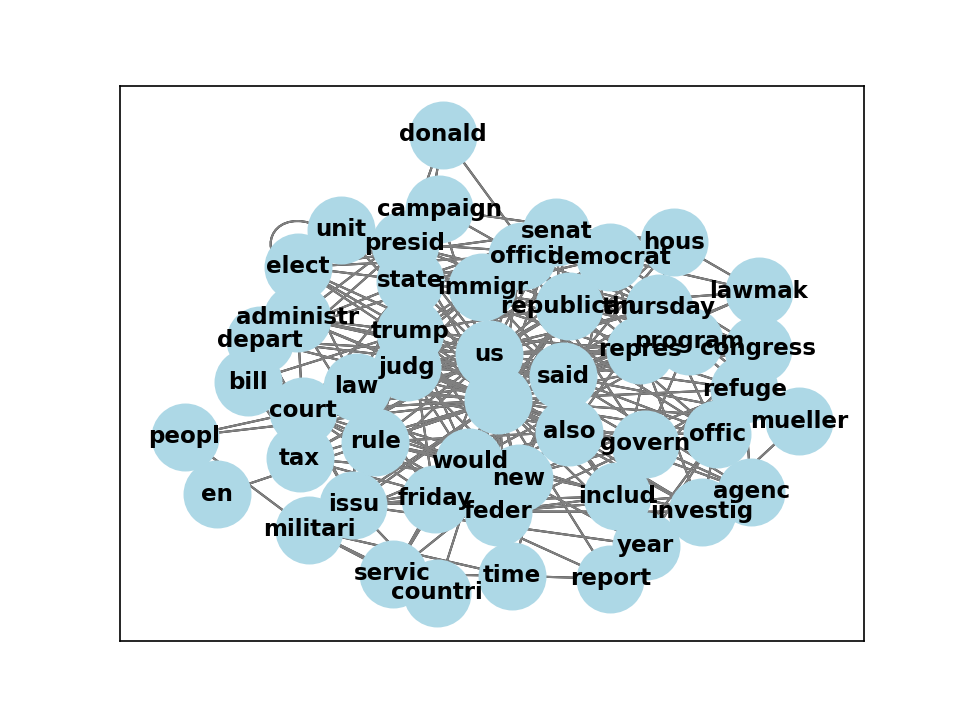

In [59]:
%matplotlib notebook

# Count the frequency of each word
word_counts = collections.Counter(stemmed_words)

# Get the top 50 words
top_words = [word for word, count in word_counts.most_common(50)]

# Define the edges using only the top 50 words
edges = []
for i in range(1, len(stemmed_words)):
    if stemmed_words[i-1] in top_words and stemmed_words[i] in top_words:
        edge = (stemmed_words[i-1], stemmed_words[i])
        edges.append(edge)
    
# Create the graph
graph = nx.Graph()

# Add the edges
graph.add_edges_from(edges)

# Set the layout
pos = nx.kamada_kawai_layout(graph)

# Create a new figure
fig = plt.figure()

# Draw the network graph
nx.draw_networkx(graph, pos=pos, with_labels=False)
nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(graph, pos, edge_color='grey')
nx.draw_networkx_labels(graph, pos, font_size=11, font_weight='bold')

# Show the plot
plt.show()

The network graph can confirm some intuition that has been alluded from the previous visualizations. For example,
- "Said" appears to be linked to most of the words of the network, suggesting that these news articles often report on statements made by individuals or organizations.

Further analysis is required to ensure readability for the visualization. 

## Wordcloud

<IPython.core.display.Javascript object>


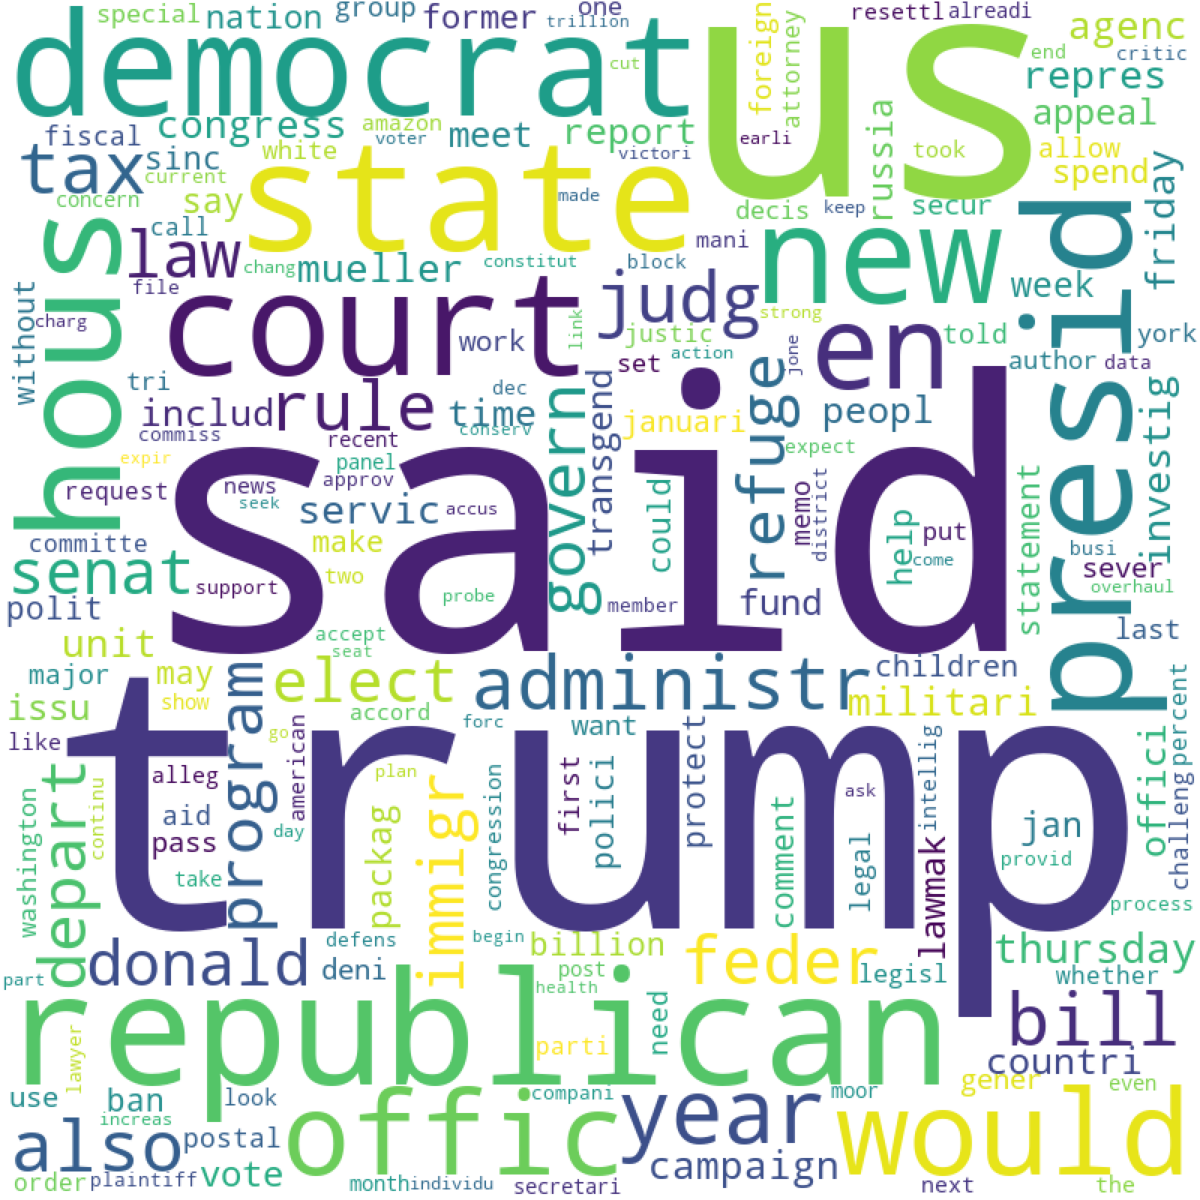

In [60]:
# Create a wordcloud
word_freq = Counter(stemmed_words)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Insights
Based on our analysis, we find the following:

#### Fake articles in the dataset had a tendency to have a more non-neutral tone than the Real articles.
According to the sentiment analysis graphs over time, it can be observed that fake articles tend to exhibit a consistently non-neutral tone (either positive or negative), in contrast to real articles which tend to maintain a more neutral tone, possibly due to their factual nature. However, while the tone of an article is not the sole factor in determining its credibility, this finding serves as a reminder that knowledge should be grounded in facts rather than emotions.

#### Trump, republican, year, and en, are shared words for both real and fake news articles.
The words "Trump" and "Republican" may suggest that politcs are a common theme in both real and fake news articles. This insight is expected, since political news is often polarized and can be a target for misinformation campaigns. Indeed, this insight is further supported when comparing both wordclouds and seeing that more political terms such as "democrat" and "clinton" are also shared. The word "year" may suggest that both real and fake news articles may cover events and trends that happen over longer periods of times, like economic or social trends. Overall, these shared keywords suggest that there may be overlap in topics covered by both real and fake news articles. It's also important to factor in that this analysis alone does not indicate whether real and fake articles are equally trustworthy or informative, as factors such as accuracy and context also play a role in the credibility of a news article.

Note: The word "en" was introduced in an earlier data cleaning step for detecting languages across the different text blocks.

#### The dendrograms share similar structures, where outliers are overrepresented.
Because the dendrograms share similar structures, this may suggest that fake and true news articles share similarities of their linguistic properties. Certain words may be used in a unique or unusual way in both types of articles, which cause their separation from the main clusters of words. Additionally, the presence of these outliners in both types suggests that topics may be covered in a unique or distinct way, such as highly controversial or polarizing, and as a result, are being discussed in different ways by different sources of news. This idea can be confirmed when looking at the bargraphs of frequently used terms. "Trump", for example, is a commonly covered topic for both types of articles that entice controversy.

However, dendrograms can be difficult to interpret the reason why they are outliers. It's unclear to point a specific reason for why these outliers occur without more analysis and context behind the analysis. Additionally, dendrograms are difficult with large datasets. In the context of this analysis, the dendrogram is analyzed from a subset of top words, which is subsetted from the first 100,000 characters of the actual dataset.

#### The word "say" is frequent in fake news articles, while "said" is frequent in true news articles
Using "say" frequently in fake news articles and "said" in true news articles can potentially indicate the authenticity of the article's language usage. However, relying solely on this indicator may not be reliable, and more analysis is necessary to gain a deeper understanding of this relationship. It's crucial to note that high frequency does not necessarily suggest the importance or significance of a word in the overall text. Therefore, analyzing the context of words is necessary to gain a more comprehensive understanding.


# Conclusion

The sentiment and clustering analysis revealed that news articles not only differ in their content but also in the way they are presented, as indicated by the differences in sentiment and clustering patterns. This highlights the significance of considering not just the factual accuracy of news articles but also their presentation and language use, as these factors can shape how individuals perceive the credibility and accuracy of the news. When considering both the sentiment and clustering analysis, this suggests that the way news is presented, beyond the content itself, can influence how individuals perceive accuracy and credibility. It's important to highlight that news articles may entice individuals towards misinformation through emotive language and euphemisms. Therefore, emphasizing the need for media literacy skills, like discerning biases in language use, being critical in the spread of fake news, and promoting informed decision-making is important as our society deals with the rapid spread and access to information.

# Challenges and Limitations
#### Dataset is large, and caused the coding process to be deferred and lengthy
A large dataset can be challenging to analyze, especially if the computational resources are limited. Subsetting the dataset can help, but it may not provide the whole picture or reveal all key insights. Additionally, analyzing a subset of the data may introduce bias or skew the results.
#### Dendrograms and network graphs are difficult to interpret with a large dataset, leading to large number of nodes and clusters.
Dendrograms and network graphs are visual representations of the relationships between words or concepts in a dataset. With a large dataset, the number of nodes and clusters can become overwhelming, making it difficult to interpret the results. It may be necessary to use other visualization techniques or algorithms that can handle larger datasets.
#### Word clouds only show the frequency of words and do not provide context or meaning behind these words
Word clouds are a popular visualization technique that shows the frequency of words in a dataset. However, they do not provide context or meaning behind these words. It is important to consider the context in which these words appear and the relationships between them to fully understand the meaning of a text.
#### Dendrograms, network graphs, and wordclouds are sensitive to noise and irrelevant information in the dataset, which can lead to misleading results
Dendrograms, network graphs, and wordclouds rely on the data in the dataset to generate insights. However, they are sensitive to noise and irrelevant information, which can lead to misleading results. Noise can arise from human error, typos, or other inaccuracies in the data, which can skew the results. It is important to preprocess the data and filter out irrelevant information before performing text analysis.

# Future Steps
#### Continue cleaning and refine the dataset
The cleaning process is a crucial step in text analysis, and it is essential to ensure that the dataset is as accurate and consistent as possible. Going forward, it would be helpful to continue refining the dataset to remove any inconsistencies, irrelevant information, or other errors that may skew the results. This may include performing additional data cleaning steps, such as filtering out non-english words and correcting spelling errors. Additionally, it may be useful to incorporate additional data sources or datasets to provide a more comprehensive view of the topic being analyzed.
#### Refine the visuals, such as combining the fake and real visualizations for a comparison barplot for easier readability
Data visualization is an important aspect of data analysis, as it can help to highlight patterns and trends that may be difficult to see in raw data. However, it is crucial to ensure that the visuals are well-designed and easy to interpret. Going forward, it would be helpful to refine the existing visuals to improve their readability and clarity. This may include combining the fake and real visualizations into a single comparison barplot to provide a more comprehensive view of the differences between the two datasets.
#### Refine the coding process, combine sections by data visualizations instead of by Dataset to improve clarity.
The coding process is an essential step in data analysis, as it involves identifying patterns and trends in the data. However, it is crucial to ensure that the coding process is well-organized and easy to follow. Going forward, it may be helpful to refine the coding process by combining sections based on the data visualizations rather than by dataset. This may help to improve clarity and make it easier to see how the different aspects of the analysis fit together. Additionally, it may be useful to incorporate additional coding tools or techniques to improve the accuracy and consistency of the analysis.